## Librerias

In [1]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas

## Leer Dataframe

In [2]:
path = 'C:/Users/ktima/OneDrive/Escritorio/proyectos/codigos_tesis/datasets/'      # directorio del archivo
sol_df = pd.read_csv(path + '1.2325_-77.29335_Solcast_PT5M.csv')   # leer archivo csv. directorio + nombre archivo
sol_df.rename({'PeriodStart':'fecha',
                'AirTemp':'Temperatura',
                'PrecipitableWater':'precipitacion', 
                'RelativeHumidity':'humedad',
                'WindDirection10m': 'dir_viento',
                'WindSpeed10m':'vel_viento' }, axis = 1 , inplace = True) # Renombra las columnas del dataframe
sol_df.head(5)  # muestra los 5 primeros registros del dataframe

,PeriodEnd,fecha,Temperatura,CloudOpacity,Dhi,Dni,Ebh,Ghi,precipitacion,humedad,dir_viento,vel_viento
0,2019-12-31T00:05:00Z,2019-12-31T00:00:00Z,13.8,88.8,0,0,0,0,21.5,100.0,355,1.1
1,2019-12-31T00:10:00Z,2019-12-31T00:05:00Z,13.8,94.2,0,0,0,0,21.5,100.0,355,1.1
2,2019-12-31T00:15:00Z,2019-12-31T00:10:00Z,13.8,96.1,0,0,0,0,21.5,100.0,356,1.1
3,2019-12-31T00:20:00Z,2019-12-31T00:15:00Z,13.7,96.9,0,0,0,0,21.5,100.0,356,1.1
4,2019-12-31T00:25:00Z,2019-12-31T00:20:00Z,13.7,97.0,0,0,0,0,21.5,100.0,357,1.1


## Configuración zona horaria

In [3]:
sol_df['fecha'] = pd.to_datetime(sol_df['fecha'])    # Se define la columna como tipo fecha
my_timezone = pytz.timezone('America/Bogota')        # Se configura la zona horaria
sol_df['fecha'] = sol_df['fecha'].dt.tz_convert(my_timezone).dt.tz_localize(None)    # Se realiza el cambio de zona horaria  
sol_df.index = sol_df['fecha'] # se configura la fecha como indice
# Se borra las columnas que no se utilizan
del(sol_df['fecha'])
del(sol_df['PeriodEnd'])
sol_df.head(5)

,Temperatura,CloudOpacity,Dhi,Dni,Ebh,Ghi,precipitacion,humedad,dir_viento,vel_viento
fecha,,,,,,,,,,
2019-12-30 19:00:00,13.8,88.8,0,0,0,0,21.5,100.0,355,1.1
2019-12-30 19:05:00,13.8,94.2,0,0,0,0,21.5,100.0,355,1.1
2019-12-30 19:10:00,13.8,96.1,0,0,0,0,21.5,100.0,356,1.1
2019-12-30 19:15:00,13.7,96.9,0,0,0,0,21.5,100.0,356,1.1
2019-12-30 19:20:00,13.7,97.0,0,0,0,0,21.5,100.0,357,1.1


## Graficas de las variables

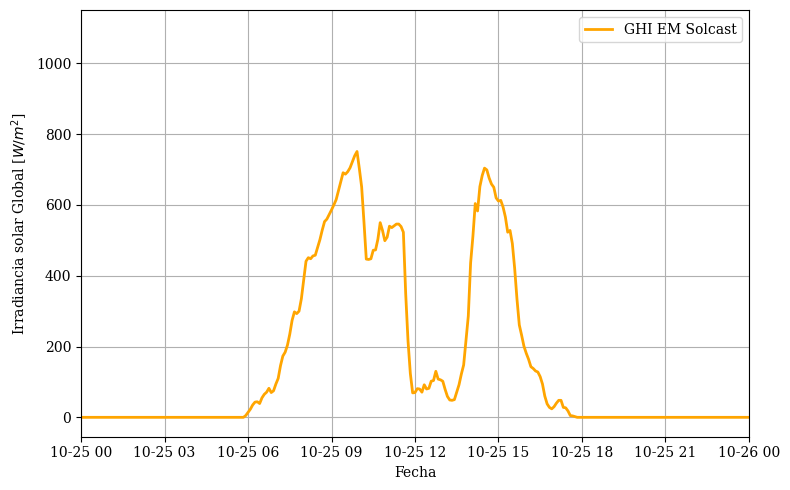

In [4]:
plt.figure(figsize=(8,5))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
plt.plot(sol_df['Ghi'], label='GHI EM Solcast', linewidth = 2, color = 'orange') # grafica
plt.xlabel('Fecha')                         # Etiqueta eje x
plt.ylabel(r'Irradiancia solar Global [$W/m^{2}$]')     # etiqueta eje y
plt.grid(True)                              
plt.xlim([datetime(2022,10,25)  , datetime(2022,10,26)])  # limite eje X
plt.legend()                                # leyenda
plt.tight_layout()                          # define la mejor disposiciones de los elementos que conforman la grafica.